In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
#%pip install torch torchvision torhcaudio --extra-index-url https://download.pytorch.org/whl/cu117
#Set-Location -Path "C:\Users\prana\OneDrive\Documents\WindowsPowerShell\profile.ps1"


In [2]:

# Check if GPU is available #cuda setup
gpu_available = torch.cuda.is_available()
print(f"Is GPU available: {gpu_available}")
if gpu_available:
    gpu_count = torch.cuda.device_count()
    gpu_name = torch.cuda.get_device_name(0)
    print(f"Number of GPUs available: {gpu_count}")
    print(f"GPU Name: {gpu_name}")
    #print(f"Current GPU Memory Allocated: {torch.cuda.memory_allocated(0)}")
    print(torch.__version__) #python 3.12.7 version installed environemnt-myenvt

Is GPU available: True
Number of GPUs available: 1
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU
2.5.1+cu118


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# LEARNING PYTORCH


In [4]:
%%time
#matrix multiplication
a = torch.tensor([[1,2],[3,4]]) #2x2
b = torch.tensor([[5,6],[7,8]]) #2x2
print(a)
print(b)
print(a*b) #element wise multiplication
#dot pdt of 2 matrices

tensor = torch.matmul(a,b) #or torch.mm(a,b)
print(tensor)

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[19, 22],
        [43, 50]])
CPU times: total: 15.6 ms
Wall time: 42.6 ms


In [5]:
#%pip install scikit-learn
from sklearn.datasets import make_circles #importing the dataset

In [6]:
Dataset = make_circles(n_samples=1000, noise=0.03, random_state=42) #generating the dataset
y_label = Dataset[1]
x_label = Dataset[0]
print(x_label.shape)
print(y_label.shape)
print(x_label[:5])
print(y_label[:5])
 

(1000, 2)
(1000,)
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [7]:
import pandas as pd
circles = pd.DataFrame(data= {"X1": x_label[:, 0], "X2": x_label[:, 1], "Y1": y_label}, columns=['X1', 'X2', 'Y1'])
circles.head()

,X1,X2,Y1
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


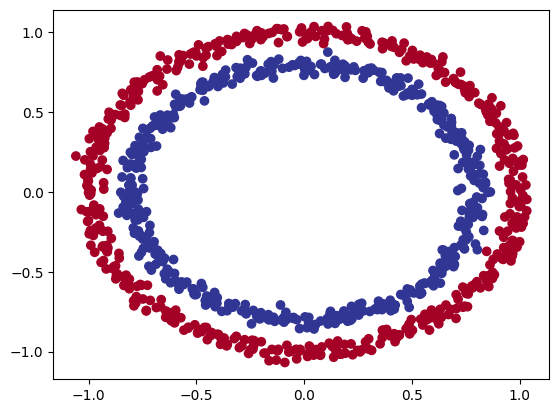

In [8]:
x_label = torch.tensor(x_label).float()
y_label = torch.tensor(y_label).float() #converting to tensor
plt.scatter(x= x_label[:, 0], y= x_label[:, 1], c= y_label, cmap='RdYlBu')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=42) 
x_test.shape , y_test.shape , x_train.shape, y_train.shape


(torch.Size([200, 2]),
 torch.Size([200]),
 torch.Size([800, 2]),
 torch.Size([800]))

In [10]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

#creating subclass of nn.modeule
#creating layers and forward pass  
#creating optimizer and loss function  
#training the model  
#evaluating the model  
#plotting the decision boundary  
#creating a model class

In [11]:

class CicleModelV0(nn.Module):
    def __init__(self):
        super().__init__() #we dont need to pass this as a fuction
#In Python 3, the super() function can be called without explicitly passing self. you don't need super(ClassName, self).__init__()
            #input layer
        self.layer1  = nn.Linear(2, 5)
            #hidden layer
            #self.layer2 = nn.Linear(, 100)
            #output layer
        self.layer2 = nn.Linear(5,1)
    def forward(self, x):
        return self.layer2(self.layer1(x))

In [12]:
model_0 = CicleModelV0().to(device)
print(device)
model_0

cuda


CicleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
#nn.sequential does everything that we did in the above cell
model_0 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1)
).to(device)

model_0  #same output as above cell


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
#looking at wts and biases
model_0.state_dict() #gives the weights and biases of the model in the form of a dictionary 

OrderedDict([('0.weight',
              tensor([[ 0.0963, -0.4968],
                      [ 0.6406,  0.4241],
                      [ 0.6592, -0.6911],
                      [-0.3823, -0.1467],
                      [-0.4497,  0.2952]], device='cuda:0')),
             ('0.bias',
              tensor([0.6589, 0.5634, 0.1992, 0.6275, 0.0052], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2034, -0.2381,  0.1961,  0.2607,  0.0876]], device='cuda:0')),
             ('1.bias', tensor([-0.3697], device='cuda:0'))])

In [15]:
#make predictions
x_train = x_train.to(device)
y_pred = model_0(x_train)
y_pred[:5]


tensor([[-0.4857],
        [-0.4411],
        [-0.2329],
        [-0.2255],
        [-0.5226]], device='cuda:0', grad_fn=<SliceBackward0>)

In [16]:
loss_fn = nn.BCEWithLogitsLoss() #binary cross entropy loss , includes sigmoid activation function in it
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) #stochastic gradient descent


In [17]:
def accuray(y_true, y_pred):
    correct =torch.eq(y_pred, y_true).sum().item() #eq is element wise comparison
    return correct/y_true.shape[0]

#Training a MODE-->
Forward PAss-->
Cal Loss-->
Optimizer Zero Grad-->
Loss Backward-->
Grad Descnt

logit is raw ouptput-->logits into prediction probab--> labels using argmax

In [18]:
with torch.inference_mode(): #turning off the gradient
    y_pred = model_0(x_test.to(device))
    

In [19]:
class Model3(nn.Module):
    def __init__(self): 
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

In [20]:
model_3 =Model3().to(device)
model_3

Model3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)